In [129]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from config import DATA_DIR

In [130]:
# Load the data
df = pd.read_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'), low_memory=False)

df.head()

,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,contributor.lname,contributor.fname,contributor.mname,...,efec.memo,efec.memo2,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore
0,1980,comm:1980:101454,24K,250.0,1980-04-19,100047885.0,NATIONAL WOMENS POLITICAL CAUCUS CAMPAIGN SUPP...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.73,-0.84
1,1980,comm:1980:101455,24K,1000.0,1980-07-19,100047885.0,NATIONAL WOMENS POLITICAL CAUCUS CAMPAIGN SUPP...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.73,-0.63
2,1980,comm:1980:101456,24K,500.0,1980-08-19,100047885.0,NATIONAL WOMENS POLITICAL CAUCUS CAMPAIGN SUPP...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.73,-0.56
3,1980,comm:1980:101457,24K,500.0,1980-08-19,100047885.0,NATIONAL WOMENS POLITICAL CAUCUS CAMPAIGN SUPP...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.73,0.89
4,1980,comm:1980:101458,24K,500.0,1980-09-19,100047885.0,NATIONAL WOMENS POLITICAL CAUCUS CAMPAIGN SUPP...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.73,-0.74


It looks like some of the contributions are not from individuals. For the purpose of this project, we'll only do analysis on individual contributors, which we'll consider to be people with a first and last name.

We should also process bonica.cid as a string, date as a date, etc.

In [131]:
# Process the id column
df['bonica.cid'] = df['bonica.cid'].astype(float).round(0).astype(int)

# Process the date column, eliminating rows with missing dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Eliminate records without a first and last name
df = df[~df['contributor.fname'].isnull()]
df = df[~df['contributor.lname'].isnull()]

# Eliminate records who aren't of type I (individual)
df = df[df['contributor.type'] == 'I']

# Eliminate the records with is.corp = True
df = df[df['is.corp'] != True]

In [132]:
df.head()

,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,contributor.lname,contributor.fname,contributor.mname,...,efec.memo,efec.memo2,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore
696,1980,indv:1980:100089,15,200.0,1979-07-10,5000002467755059,"pruitt, carol",pruitt,carol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.17,1.40
697,1980,indv:1980:100730,24T,20.0,1980-03-07,3756304731,"africa, charles",africa,charles,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.22,1.16
698,1980,indv:1980:100778,15,150.0,1979-05-30,2928982254,"miller, john t",miller,john,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
699,1980,indv:1980:100860,15,300.0,1979-05-31,29175920209,"carter, albert m",carter,albert,m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.79,NaN
700,1980,indv:1980:100997,15,600.0,1980-05-20,29175920209,"carter, albert m",carter,albert,m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.79,NaN


In [133]:
# What's the minimum and maximum date?
print(df['date'].min(), df['date'].max())

# Eliminate all dates after 2000 or before 1980
df = df[df['date'] >= '1980-01-01']
df = df[df['date'] <= '2000-12-31']

print(df['date'].min(), df['date'].max())

1978-05-08 00:00:00 2094-11-14 00:00:00
1980-01-02 00:00:00 2000-03-30 00:00:00


In [134]:
# The contributions in 2000 and before 1980 are in error, so let's eliminate them
df = df[df['date'] >= '1980-01-01']
df = df[df['date'] <= '1999-12-31']

print(df['date'].min(), df['date'].max())

1980-01-02 00:00:00 1999-12-19 00:00:00


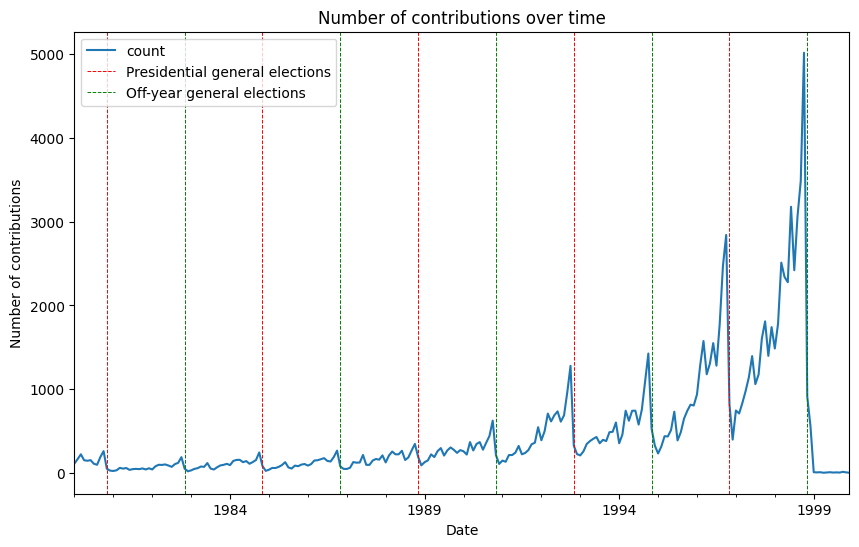

In [135]:
# Plot the number of contributions over time, grouping by month
plt.figure(figsize=(10, 6))
grouped = df['date'].dt.to_period('M').value_counts().sort_index()
grouped.plot()

# Add vertical dashed lines at the major general election dates
plt.axvline('1980-11-04', color='r', linestyle='--', linewidth=0.7, label='Presidential general elections')
plt.axvline('1982-11-02', color='g', linestyle='--', linewidth=0.7, label='Off-year general elections')
plt.axvline('1984-11-06', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1986-11-04', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1988-11-08', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1990-11-06', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1992-11-03', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1994-11-08', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1996-11-05', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1998-11-03', color='g', linestyle='--', linewidth=0.7)

plt.xlabel('Date')
plt.ylabel('Number of contributions')
plt.title('Number of contributions over time')
plt.legend(loc='upper left')
plt.show()

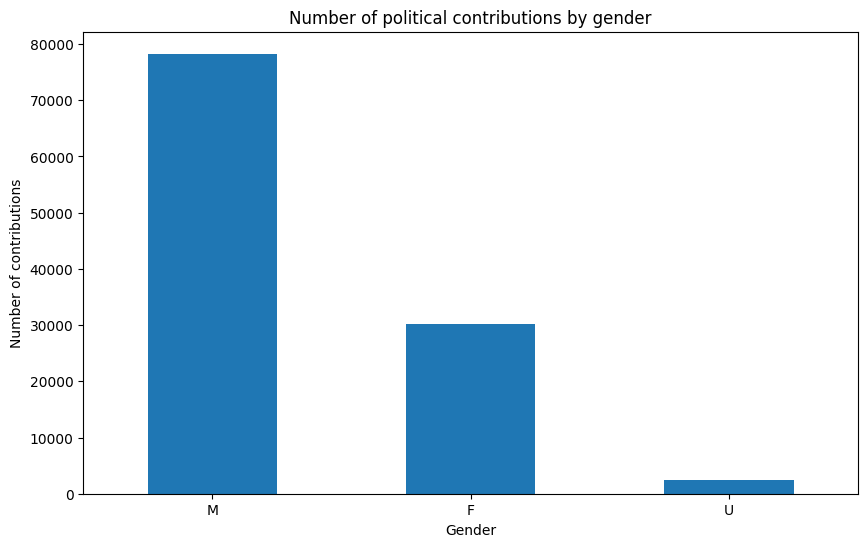

In [136]:
plt.figure(figsize=(10, 6))
df['contributor.gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of contributions')
plt.title('Number of political contributions by gender')
plt.xticks(rotation=0)
plt.show()


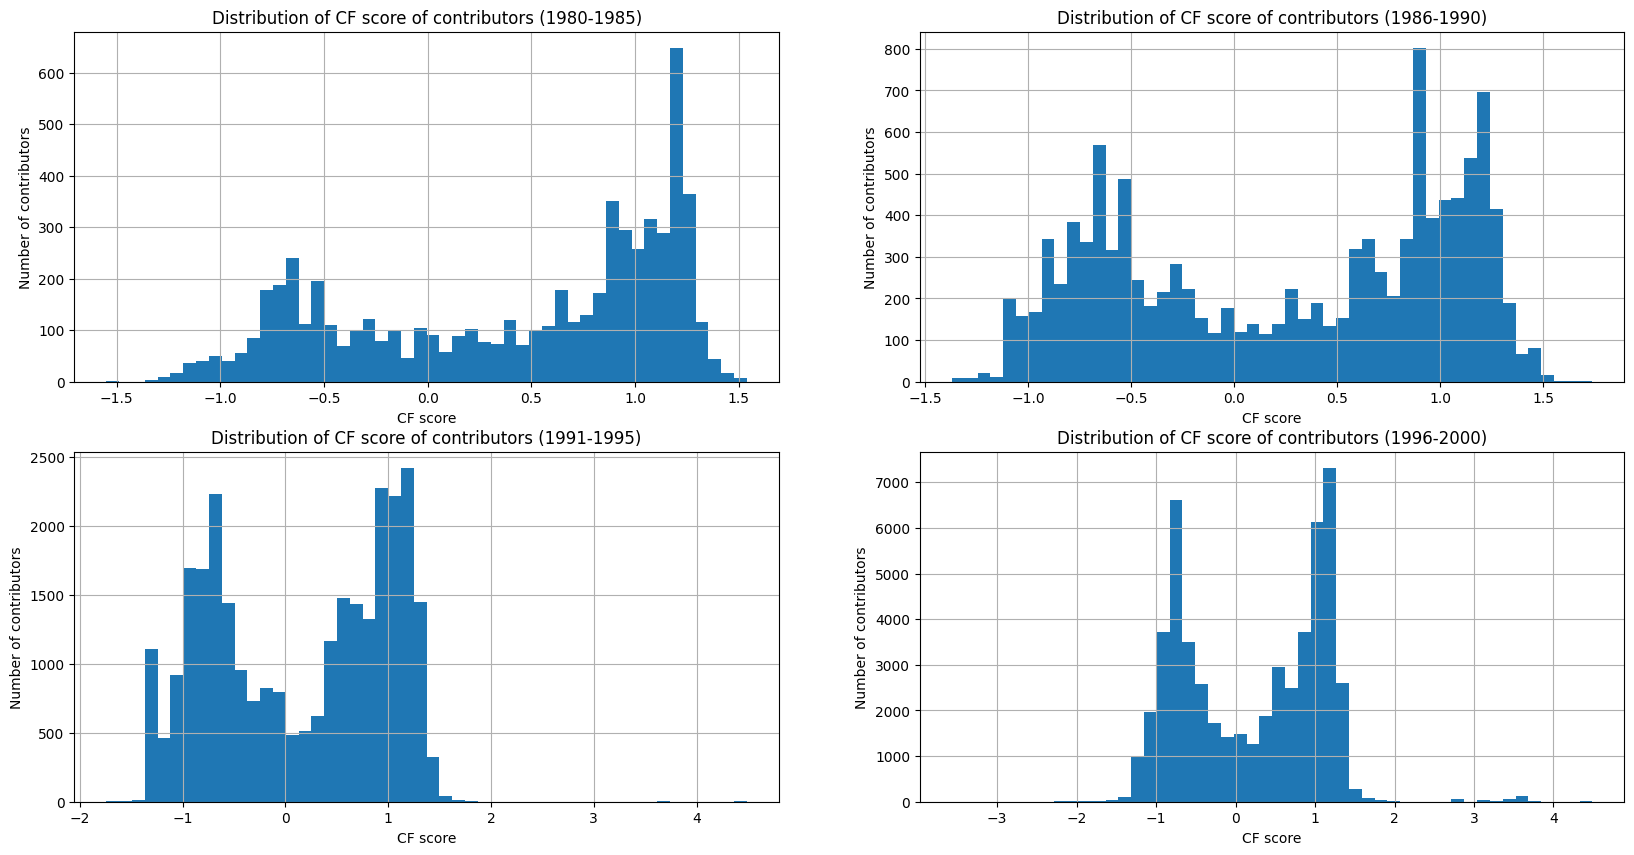

In [137]:
# Split the time period into four equal intervals
time_periods = ['1980-1985', '1986-1990', '1991-1995', '1996-2000']

# Plot the distribution of CF score of contributors over time
plt.subplots(2, 2, figsize=(20, 10))
for i, period in enumerate(time_periods):
    plt.subplot(2, 2, i + 1)
    df[df['date'].dt.year.between(int(period[:4]), int(period[-4:]))]['contributor.cfscore'].hist(bins=50)
    # plt.xlim(-2, 2)
    plt.xlabel('CF score')
    plt.ylabel('Number of contributors')
    plt.title(f'Distribution of CF score of contributors ({period})')


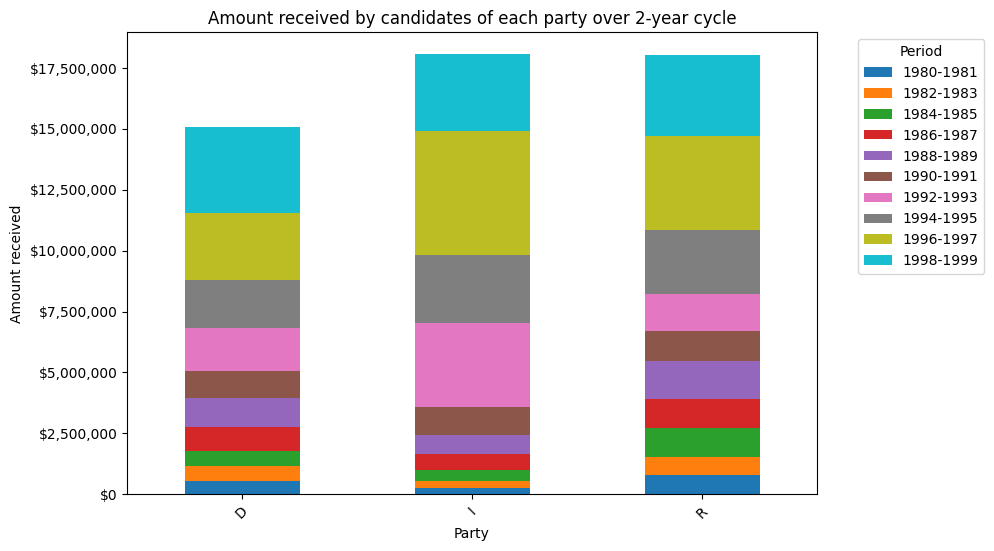

In [138]:
import matplotlib.ticker as ticker
# Number of dollars received by candidates of each party over time

# Just for this graph, group non-major parties together (100 = D, 200 = R, all else = I)
df_party = df.copy()

def party(x):
    try:
        if int(x) == 100:
            return 'D'
        elif int(x) == 200:
            return 'R'
        else:
            return 'I'
    except ValueError:
        return 'I'
    

df_party['recipient.party'] = df_party['recipient.party'].apply(party)

# Calculate periods
min_year = df_party['date'].dt.year.min()
df_party['period'] = ((df_party['date'].dt.year - min_year) / 2).astype(int)

# Create a label for each period that shows the start and end year
def period_label(row):
    start_year = min_year + row['period'] * 2
    return f'{start_year}-{start_year + 1}'

df_party['period_label'] = df_party.apply(period_label, axis=1)

# Group by party and period_label, then sum amounts
grouped = df_party.groupby(['recipient.party', 'period_label'])['amount'].sum().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left', labels=grouped.columns)
plt.xlabel('Party')
plt.ylabel('Amount received')
plt.title('Amount received by candidates of each party over 2-year cycle')
plt.xticks(rotation=45) # Rotate labels to fit them better

# Money formatter
def money_formatter(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.show()

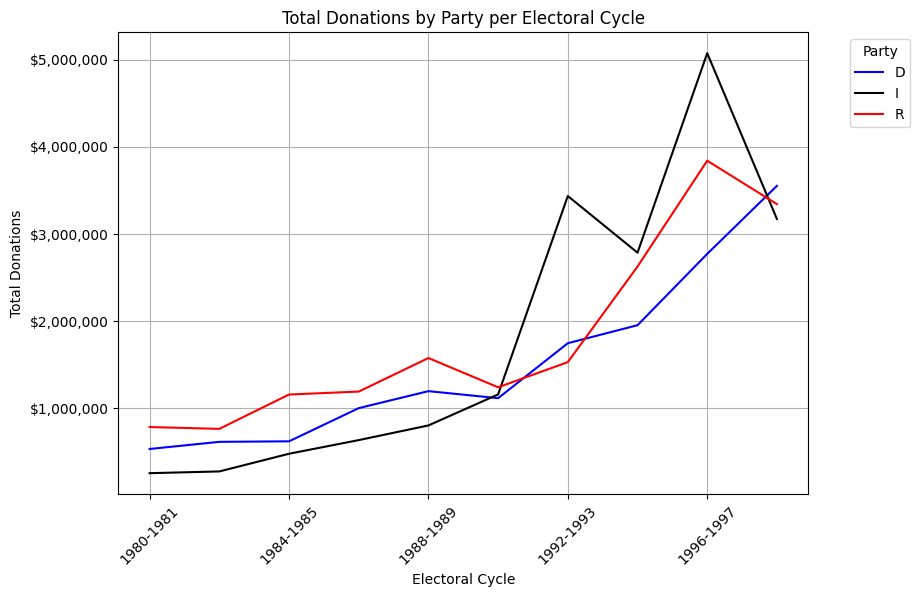

In [139]:
# Adjusted plotting section with specified line colors
fig, ax = plt.subplots(figsize=(12, 6))

party_grouped = df_party.groupby(['period_label', 'recipient.party'])['amount'].sum().unstack(fill_value=0)

# Specify colors for each line according to the party
colors = {'D': 'blue', 'R': 'red', 'I': 'black'}

# Check and order colors according to the party order in 'grouped' DataFrame
line_colors = [colors[party] for party in party_grouped.columns if party in colors]

# for party in party_grouped.columns:

# Plot each party as a line with specified colors
party_grouped.plot(kind='line', ax=ax, color=line_colors)

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Electoral Cycle')
plt.ylabel('Total Donations')
plt.title('Total Donations by Party per Electoral Cycle')
plt.xticks(rotation=45)

# Use custom formatter for the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.grid(True)
plt.show()

### Target Exploration

Let's explore the target variable a bit to get a sense of what we're working with.

In [140]:
# Print the distribution of amounts
print(df['amount'].describe())

print(f"\nThere are {len(df[df['amount'] < 0])} contributions with negative amounts.")

count    110844.000000
mean        461.957829
std        2573.706070
min      -26000.000000
25%          25.000000
50%         250.000000
75%         500.000000
max      300000.000000
Name: amount, dtype: float64

There are 1526 contributions with negative amounts.


#### Outliers

In [141]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"There are {outlier_count} outliers in the dataset.")
print(f"The lower bound is {lower_bound} and the upper bound is {upper_bound}.")

There are 3593 outliers in the dataset.
The lower bound is -687.5 and the upper bound is 1212.5.


#### Distribution

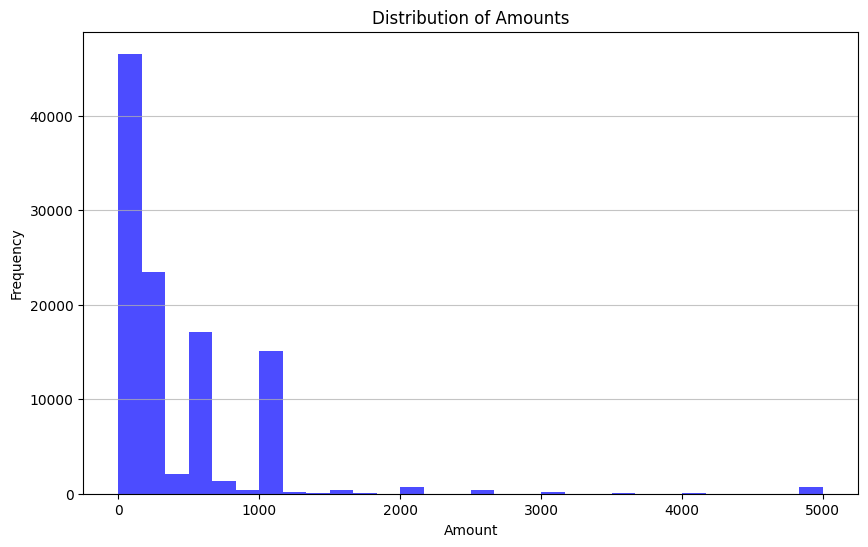

In [142]:
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=30, alpha=0.7, color='blue', range=(0, 5000))
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

#### Analysis

We can see there are spikes at the common, rounded amounts of $500, $1000, $2000, $3000, $5000, etc. Most donations are close to 0 however, with a long tail of larger donations.

As shown above, the median is $250, with a lower quartile of $25 and an upper quartile of $500. The mean is $462, which is higher than the median due to the long tail of larger donations.

In [143]:
# total repeat donors
n_unique_donors = df['bonica.cid'].nunique()
n_transactions = df.shape[0]

# Repeat donors are ones whose bonica.cid appears more than once
num_repeat_donors = df['bonica.cid'].value_counts().gt(1).sum()
num_non_repeat_donors = df['bonica.cid'].value_counts().eq(1).sum()

print(f"After elimination, there are {n_unique_donors} unique donors and {n_transactions} transactions.")
print(f"There are {num_repeat_donors} repeat donors and {num_non_repeat_donors} non-repeat donors, so {num_repeat_donors / n_unique_donors:.2%} of donors are repeat donors.")

After elimination, there are 39407 unique donors and 110844 transactions.
There are 14306 repeat donors and 25101 non-repeat donors, so 36.30% of donors are repeat donors.


There are 5788 donors who donated 2 times.
There are 2568 donors who donated 3 times.
There are 1407 donors who donated 4 times.
There are 872 donors who donated 5 times.
There are 676 donors who donated 6 times.
There are 462 donors who donated 7 times.
There are 381 donors who donated 8 times.
There are 265 donors who donated 9 times.
There are 225 donors who donated 10 times.
There are 186 donors who donated 11 times.
There are 139 donors who donated 12 times.
There are 114 donors who donated 13 times.
There are 111 donors who donated 14 times.
There are 1021 donors who donated more than 15 times.


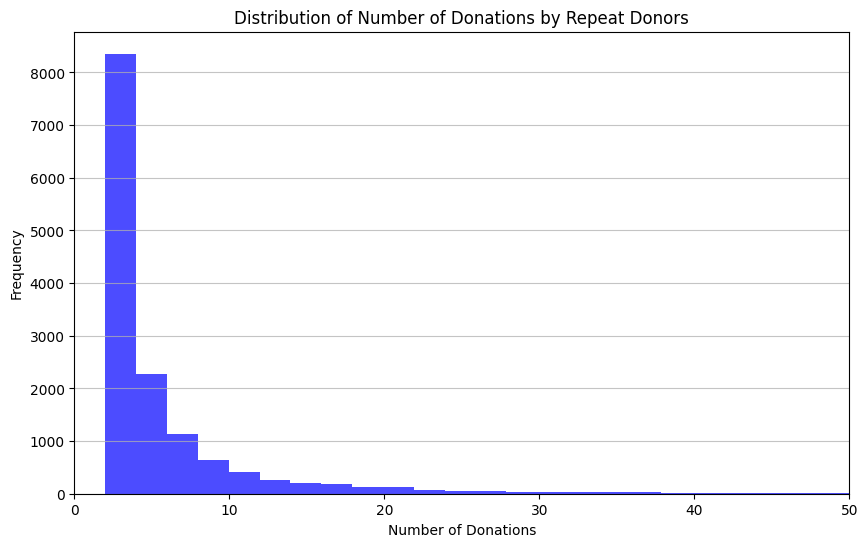

In [144]:
# Find the repeat donors
repeat_donor_df = df[df['bonica.cid'].duplicated(keep=False)]

# Mark them in the original DataFrame
df['repeat_donor'] = df['bonica.cid'].isin(repeat_donor_df['bonica.cid'])

# Ensure every donor appears more than once in the dataset
assert (repeat_donor_df['bonica.cid'].value_counts() > 1).all(), "Not all donors appear more than once in the dataset."

# Plot the distribution of the number of times someone donates (of repeat donors)
repeat_donor_counts = repeat_donor_df['bonica.cid'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(repeat_donor_counts, bins=200, alpha=0.7, color='blue')
plt.title('Distribution of Number of Donations by Repeat Donors')
plt.xlabel('Number of Donations')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.grid(axis='y', alpha=0.75)

for i in range(2, 15):
    print(f"There are {repeat_donor_counts[repeat_donor_counts == i].shape[0]} donors who donated {i} times.")
print(f"There are {repeat_donor_counts[repeat_donor_counts > 15].shape[0]} donors who donated more than 15 times.")

We'll wait to normalize the target variable until train time, as we may want to use the raw target variable for some models and certainly visualizations.

### Inflation adjustment

Since the data spans multiple years, we should adjust the dollar amounts for inflation. We can use the CPI for this purpose.

In [145]:
# Adjust for inflation
inflation_rates = pd.read_csv(os.path.join(DATA_DIR, 'US_inflation_rates.csv'), dtype={'year': int, 'rate': float})
year_to_rate = dict(zip(inflation_rates['year'], inflation_rates['rate']))

# For each donation 
def adjust_amount(row):
    year = row['date'].year
    adjusted_amount = row['amount']

    for i in range(year, 2023):
        adjusted_amount *= (1 + year_to_rate[i] / 100)
    
    return round(adjusted_amount, 2)

print(f"A donation of $100 in 1980 would be worth ${adjust_amount({'date': pd.Timestamp('1980-01-01'), 'amount': 100}):.2f} in 2023.")
print(f"A donation of $100 in 1990 would be worth ${adjust_amount({'date': pd.Timestamp('1990-01-01'), 'amount': 100}):.2f} in 2023.")
print(f"A donation of $100 in 2000 would be worth ${adjust_amount({'date': pd.Timestamp('2000-01-01'), 'amount': 100}):.2f} in 2023.")

A donation of $100 in 1980 would be worth $402.79 in 2023.
A donation of $100 in 1990 would be worth $235.89 in 2023.
A donation of $100 in 2000 would be worth $175.44 in 2023.


In [146]:
# Perform the inflation adjustment
df['adjusted_amount'] = df.apply(adjust_amount, axis=1)

df.head()

,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,contributor.lname,contributor.fname,contributor.mname,...,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore,repeat_donor,adjusted_amount
697,1980,indv:1980:100730,24T,20.0,1980-03-07,3756304731,"africa, charles",africa,charles,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1.22,1.16,False,80.56
700,1980,indv:1980:100997,15,600.0,1980-05-20,29175920209,"carter, albert m",carter,albert,m,...,NaN,NaN,NaN,NaN,NaN,1,0.79,NaN,True,2416.73
707,1980,indv:1980:102314,15,500.0,1980-06-17,3095049009,"ray, john",ray,john,NaN,...,NaN,NaN,NaN,NaN,NaN,1,-0.58,-0.57,False,2013.94
713,1980,indv:1980:102901,15,1000.0,1980-04-10,2576823333,"mccollum, l f",mccollum,l,f,...,NaN,NaN,NaN,NaN,NaN,0,1.04,0.29,True,4027.88
714,1980,indv:1980:102905,15,1000.0,1980-04-10,3935863119,"fisher, herbert e",fisher,herbert,e,...,NaN,NaN,NaN,NaN,NaN,1,0.31,0.29,False,4027.88


### Variable encodings

We'd probably like to encode the candidate seat types, contributor state, and some other information so they can be used in models. Let's take a look at the useful variables.

In [147]:
# Print all the columns
print(df.columns)

Index(['cycle', 'transaction.id', 'transaction.type', 'amount', 'date',
       'bonica.cid', 'contributor.name', 'contributor.lname',
       'contributor.fname', 'contributor.mname', 'contributor.suffix',
       'contributor.title', 'contributor.ffname', 'contributor.type',
       'contributor.gender', 'contributor.address', 'contributor.city',
       'contributor.state', 'contributor.zipcode', 'contributor.occupation',
       'contributor.employer', 'occ.standardized', 'is.corp', 'recipient.name',
       'bonica.rid', 'recipient.party', 'recipient.type', 'recipient.state',
       'seat', 'election.type', 'latitude', 'longitude', 'gis.confidence',
       'contributor.district.90s', 'contributor.district.00s',
       'contributor.district.10s', 'censustract', 'efec.memo', 'efec.memo2',
       'efec.transaction.id.orig', 'bk.ref.transaction.id', 'efec.org.orig',
       'efec.comid.orig', 'efec.form.type', 'excluded.from.scaling',
       'contributor.cfscore', 'candidate.cfscore', 'repeat

In [148]:
# How many unique values of each variable are there?
for column in ['contributor.gender', 'contributor.state', 'occ.standardized', 'seat', 'election.type']:
    print(f"{column}: {df[column].nunique()} unique values")

contributor.gender: 3 unique values
contributor.state: 83 unique values
occ.standardized: 31 unique values
seat: 37 unique values
election.type: 4 unique values


In [149]:
# Gender should clearly be a one-hot encoding
df = pd.get_dummies(df, columns=['contributor.gender'])

Instead of one-hot encoding the contributor state, we can simply use the latitude and longitude, since any tree-based model will be able to learn at least as much more more from this than the state (assuming it is deep enough). Let's check that the coordinates have high enough feature presence, though.

In [150]:
# Print the feature presence of latitude/longitude
print(f"Latitude: {df['latitude'].notnull().sum()} non-null values ({df['latitude'].notnull().sum() / df.shape[0]:.2%})")
print(f"Longitude: {df['longitude'].notnull().sum()} non-null values ({df['longitude'].notnull().sum() / df.shape[0]:.2%})")

Latitude: 106398 non-null values (95.99%)
Longitude: 106398 non-null values (95.99%)


That seems high enough to use as a feature. For the remainder, let's not impute the middle of the US, since that would be confusing for the model. Instead, we'll add a feature presence indicator for the latitude/longitude (given that when one is present, both are).

In [151]:
# Add a feature presence for latitude/longitude
df['has_location'] = df['latitude'].notnull() & df['longitude'].notnull()

In [152]:
# Print all the unique seat types and how many there are
print(df['seat'].value_counts())

seat
state:committee                 28222
federal:committee               18583
federal:house                   17246
federal:senate                  14296
state:governor                   7594
state:lower                      7575
federal:president                4342
state:upper                      4041
local:council                    2883
state:office                     2553
state:judicial                   1330
state:judicial:lower              395
local:judicial:other              317
state:attorneyg                   313
state:auditor                     205
state:secofstate                  170
state:lgovernor                   111
state:attorney                    105
local:sheriff                     100
state:treasurer                    89
local:attorney                     64
local:other                        49
local:mayor                        46
local:public-defender              41
state:comptroller                  30
state:board-education              29
local:c

It seems we can capture basically all the contributions with the top 10 or so positions, so we'll do that (accumulating state:judicial_lower into state:judicial), and tag the rest of the seats as 'other'.

In [153]:
# One-hot encode the seat types, but only for the following
seat_types = df['seat'].value_counts().index[:11]

# For those not in the top 11, set them to 'Other'
df.loc[~df['seat'].isin(seat_types), 'seat_capped'] = 'other'
df.loc[df['seat'].isin(seat_types), 'seat_capped'] = df['seat']

# Now, set those with state:judicial:lower to the one-hot with state:judicial
df.loc[df['seat_capped'] == 'state:judicial:lower', 'seat_capped'] = 'state:judicial'

# One-hot encode the seat types
df = pd.get_dummies(df, columns=['seat_capped'], prefix='seat')

Given the number of unique standardized occupations, their low feature presence, and the complexity of aggregating them to the donor level (they are at the contribution level now, so one donor may have none or multiple conflicting occupations), we'll drop this variable.

In [154]:
# Let's look at the transaction type value counts
print(df['transaction.type'].value_counts())

transaction.type
15S    52878
15     52081
15L     2849
22Y     1211
15C      504
24I      316
15J      304
10       249
15E      213
24Z      111
24T       83
16C       30
18L        5
22S        4
16S        3
15Z        3
Name: count, dtype: int64


After looking at the codebook [here](https://www.dropbox.com/scl/fi/5dwkr5dck20blehajb5oo/dime_codebook_v3_1.pdf?rlkey=4ig966860rwf4zsxxut31uaia&dl=1), we likely don't want to keep contributions that are **22Y** ("CONTRIBUTION REFUND TO INDIVIDUAL"), **18G** ("TRANSFER IN AFFILIATED"), **16C** ("LOANS RECEIVED FROM THE CANDIDATE"). Generally, only **15** ("CONTRIBUTION"), and 15S (state), 15L (local), 15E (earmarked), etc. are of interest. So, we'll filter out the rest.

In [155]:
# Filter out transactions which are not of type starting with 15
print(f"Eliminating {df[~df['transaction.type'].str.startswith('15')].shape[0]} transactions not starting with 15 (out of {df.shape[0]} total), which is {df[~df['transaction.type'].str.startswith('15')].shape[0] / df.shape[0]:.2%} of the dataset.")
df = df[df['transaction.type'].str.startswith('15')]

Eliminating 2012 transactions not starting with 15 (out of 110844 total), which is 1.82% of the dataset.


In [156]:
# Print the columns
print(df.columns)

Index(['cycle', 'transaction.id', 'transaction.type', 'amount', 'date',
       'bonica.cid', 'contributor.name', 'contributor.lname',
       'contributor.fname', 'contributor.mname', 'contributor.suffix',
       'contributor.title', 'contributor.ffname', 'contributor.type',
       'contributor.address', 'contributor.city', 'contributor.state',
       'contributor.zipcode', 'contributor.occupation', 'contributor.employer',
       'occ.standardized', 'is.corp', 'recipient.name', 'bonica.rid',
       'recipient.party', 'recipient.type', 'recipient.state', 'seat',
       'election.type', 'latitude', 'longitude', 'gis.confidence',
       'contributor.district.90s', 'contributor.district.00s',
       'contributor.district.10s', 'censustract', 'efec.memo', 'efec.memo2',
       'efec.transaction.id.orig', 'bk.ref.transaction.id', 'efec.org.orig',
       'efec.comid.orig', 'efec.form.type', 'excluded.from.scaling',
       'contributor.cfscore', 'candidate.cfscore', 'repeat_donor',
       'adjus

In [157]:
columns_to_drop = [
    "transaction.type",
    "contributor.name",
    "contributor.lname",
    "contributor.fname",
    "contributor.mname",
    "contributor.suffix",
    "contributor.title",
    "contributor.ffname",
    "contributor.type",
    'contributor.address',
    'contributor.city',
    'contributor.occupation',
    'contributor.employer',
    'occ.standardized',
    'is.corp',
    'gis.confidence',
    'contributor.district.90s',
    'contributor.district.00s',
    'contributor.district.10s',
    'censustract',
    'efec.memo',
    'efec.memo2',
    'efec.transaction.id.orig',
    'bk.ref.transaction.id',
    'efec.org.orig',
    'efec.comid.orig',
    'efec.form.type',
    'excluded.from.scaling'
]

# Drop the unneeded columns
df = df.drop(columns=columns_to_drop)

In [158]:
df.head()

,cycle,transaction.id,amount,date,bonica.cid,contributor.state,contributor.zipcode,recipient.name,bonica.rid,recipient.party,...,seat_federal:president,seat_federal:senate,seat_local:council,seat_other,seat_state:committee,seat_state:governor,seat_state:judicial,seat_state:lower,seat_state:office,seat_state:upper
700,1980,indv:1980:100997,600.0,1980-05-20,29175920209,NY,14609,TOOLING & MACHINING PAC OF THE NATIONAL TOOLIN...,comm7906,NaN,...,False,False,False,False,False,False,False,False,False,False
707,1980,indv:1980:102314,500.0,1980-06-17,3095049009,NY,14224,"NOWAK, HENRY J",cand281,100,...,False,False,False,False,False,False,False,False,False,False
713,1980,indv:1980:102901,1000.0,1980-04-10,2576823333,TX,77027,"LONG, RUSSELL B",cand3297,100,...,False,True,False,False,False,False,False,False,False,False
714,1980,indv:1980:102905,1000.0,1980-04-10,3935863119,TX,77027,"LONG, RUSSELL B",cand3297,100,...,False,True,False,False,False,False,False,False,False,False
715,1980,indv:1980:102932,1000.0,1980-04-14,5000003919772129,LA,71301,"LONG, RUSSELL B",cand3297,100,...,False,True,False,False,False,False,False,False,False,False


In [159]:
# Write the final sample to a CSV file
df.to_csv(os.path.join(DATA_DIR, 'sample_contributions_processed.csv'), index=False)